In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
# 한글폰트 출력 가능 코드
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [5]:
df = pd.read_csv('./xgboost_data/최종xg부스트데이터.csv',encoding="cp949")
df

,Unnamed: 0.1,Unnamed: 0,Date,대형가치주CAPM,대형성장주CAPM,중소형가치주CAPM,중소형성장주CAPM,대형가치주포트폴리오분산,대형성장주포트폴리오분산,중소형가치주포트폴리오분산,...,대형성장주최소분산,중소형가치주최소분산,중소형성장주최소분산,월,년,샤프수익률 라벨링,최대수익률 라벨링,최소분산 라벨링,코스피,코스피분산
0,0,0,2010-05-01,-4.433982,-6.359876,-6.364891,-6.294719,0.000454,0.000946,0.001075,...,0,0,0,5,2010,2,0,0,-4.738337,0.005654
1,1,1,2010-06-01,2.174986,3.215907,3.080370,3.142208,0.001116,0.002305,0.002460,...,0,0,0,6,2010,1,1,0,2.647403,0.005566
2,2,2,2010-07-01,2.707938,4.020971,3.856841,3.898303,0.000944,0.001957,0.002060,...,0,0,0,7,2010,1,1,0,2.316019,0.005577
3,3,3,2010-08-01,-0.769033,-1.123758,-1.043282,-1.094408,0.000840,0.001750,0.001818,...,0,0,0,8,2010,2,0,0,1.794264,0.005324
4,4,4,2010-09-01,5.209054,7.467547,6.942767,7.317975,0.000762,0.001589,0.001644,...,0,0,0,9,2010,0,1,0,3.039742,0.005309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,140,140,2022-01-01,-7.274122,-10.522245,-7.356209,-7.056921,0.001419,0.004182,0.002058,...,0,0,0,1,2022,3,3,0,-4.113848,0.002954
141,141,141,2022-02-01,0.824954,1.137234,0.834210,0.809960,0.001533,0.004365,0.002143,...,0,0,0,2,2022,0,1,0,-4.939258,0.003062
142,142,142,2022-03-01,0.944961,1.279130,0.950040,0.925256,0.001530,0.004354,0.002137,...,0,0,0,3,2022,0,1,0,-0.928732,0.003056
143,143,143,2022-04-01,-2.299893,-3.320663,-2.374777,-2.237390,0.001514,0.004307,0.002113,...,0,0,0,4,2022,3,3,0,0.167734,0.003023


In [6]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Date', '대형가치주CAPM', '대형성장주CAPM',
       '중소형가치주CAPM', '중소형성장주CAPM', '대형가치주포트폴리오분산', '대형성장주포트폴리오분산',
       '중소형가치주포트폴리오분산', '중소형성장주포트폴리오분산', '대형가치주샤프지수', '대형성장주샤프지수',
       '중소형가치주샤프지수', '중소형성장주샤프지수', '코스피200수익률', '최대수익률', '최소분산', '샤프모델최대',
       '대형가치주안정', '대형성장주안정', '중소형가치주안정', '중소형성장주안정', '대형가치주', '대형성장주',
       '중소형가치주', '중소형성장주', '대형가치주최소분산', '대형성장주최소분산', '중소형가치주최소분산',
       '중소형성장주최소분산', '월', '년', '샤프수익률 라벨링', '최대수익률 라벨링', '최소분산 라벨링', '코스피',
       '코스피분산'],
      dtype='object')

In [7]:
X_data = df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'Date', '대형가치주CAPM', '대형성장주CAPM',
       '중소형가치주CAPM', '중소형성장주CAPM', '대형가치주포트폴리오분산', '대형성장주포트폴리오분산',
       '중소형가치주포트폴리오분산', '중소형성장주포트폴리오분산', '대형가치주샤프지수', '대형성장주샤프지수',
       '중소형가치주샤프지수', '중소형성장주샤프지수', '최대수익률', '최소분산', '샤프모델최대',
       '대형가치주안정', '대형성장주안정', '중소형가치주안정', '중소형성장주안정', '대형가치주', '대형성장주',
       '중소형가치주', '중소형성장주', '대형가치주최소분산', '대형성장주최소분산', '중소형가치주최소분산',
       '중소형성장주최소분산', '월', '샤프수익률 라벨링', '최대수익률 라벨링', '최소분산 라벨링','코스피200수익률'],axis=1 )
X_data.columns

Index(['년', '코스피', '코스피분산'], dtype='object')

In [8]:
df

,Unnamed: 0.1,Unnamed: 0,Date,대형가치주CAPM,대형성장주CAPM,중소형가치주CAPM,중소형성장주CAPM,대형가치주포트폴리오분산,대형성장주포트폴리오분산,중소형가치주포트폴리오분산,...,대형성장주최소분산,중소형가치주최소분산,중소형성장주최소분산,월,년,샤프수익률 라벨링,최대수익률 라벨링,최소분산 라벨링,코스피,코스피분산
0,0,0,2010-05-01,-4.433982,-6.359876,-6.364891,-6.294719,0.000454,0.000946,0.001075,...,0,0,0,5,2010,2,0,0,-4.738337,0.005654
1,1,1,2010-06-01,2.174986,3.215907,3.080370,3.142208,0.001116,0.002305,0.002460,...,0,0,0,6,2010,1,1,0,2.647403,0.005566
2,2,2,2010-07-01,2.707938,4.020971,3.856841,3.898303,0.000944,0.001957,0.002060,...,0,0,0,7,2010,1,1,0,2.316019,0.005577
3,3,3,2010-08-01,-0.769033,-1.123758,-1.043282,-1.094408,0.000840,0.001750,0.001818,...,0,0,0,8,2010,2,0,0,1.794264,0.005324
4,4,4,2010-09-01,5.209054,7.467547,6.942767,7.317975,0.000762,0.001589,0.001644,...,0,0,0,9,2010,0,1,0,3.039742,0.005309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,140,140,2022-01-01,-7.274122,-10.522245,-7.356209,-7.056921,0.001419,0.004182,0.002058,...,0,0,0,1,2022,3,3,0,-4.113848,0.002954
141,141,141,2022-02-01,0.824954,1.137234,0.834210,0.809960,0.001533,0.004365,0.002143,...,0,0,0,2,2022,0,1,0,-4.939258,0.003062
142,142,142,2022-03-01,0.944961,1.279130,0.950040,0.925256,0.001530,0.004354,0.002137,...,0,0,0,3,2022,0,1,0,-0.928732,0.003056
143,143,143,2022-04-01,-2.299893,-3.320663,-2.374777,-2.237390,0.001514,0.004307,0.002113,...,0,0,0,4,2022,3,3,0,0.167734,0.003023


In [9]:
y_data = df["샤프수익률 라벨링"]

In [10]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # model 평가

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_data, 
                                                    y_data , 
                                                    test_size=0.2, 
                                                    random_state=100,
                                                    )

In [12]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(116, 3) (29, 3)
(116,) (29,)


In [13]:
# 객체 생성
model = XGBClassifier()
xgb_model = model.fit(X_train, y_train)

In [14]:
fscore = model.get_booster().get_fscore()
fscore

{'년': 430.0, '코스피': 1326.0, '코스피분산': 1149.0}

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

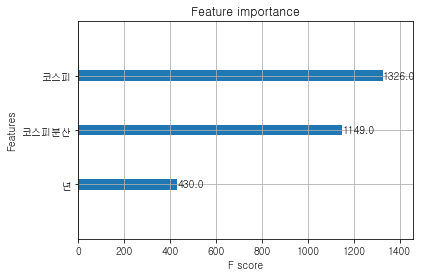

In [15]:
plot_importance(model)

In [16]:
y_pred = model.predict(X_test) # 예측치
y_true = y_test # 정답

In [17]:
acc = accuracy_score(y_true, y_pred)
acc

0.5862068965517241

In [18]:
con_mat = confusion_matrix(y_true, y_pred)
con_mat

array([[5, 0, 2, 0],
       [0, 0, 1, 1],
       [1, 1, 6, 2],
       [2, 0, 2, 6]], dtype=int64)

In [19]:
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.00      0.00      0.00         2
           2       0.55      0.60      0.57        10
           3       0.67      0.60      0.63        10

    accuracy                           0.59        29
   macro avg       0.46      0.48      0.47        29
weighted avg       0.57      0.59      0.58        29



In [20]:
y_pred

array([0, 2, 3, 3, 0, 2, 1, 0, 2, 0, 2, 2, 0, 3, 0, 0, 2, 2, 2, 0, 3, 3,
       3, 2, 3, 3, 2, 2, 3], dtype=int64)

In [21]:
y_true

29     2
111    3
88     1
105    3
117    0
62     0
104    2
11     0
32     2
28     0
15     2
37     2
144    3
110    3
40     0
26     0
51     2
73     2
95     2
140    3
120    3
127    3
106    3
97     3
134    2
102    2
77     0
112    1
131    3
Name: 샤프수익률 라벨링, dtype: int64

**아리마로 예측한 코스피와 코스피200 으로 2022스타일배분 예측**

In [22]:
test= pd.read_csv('xgboost_data\시험용 코스피예측과 년도.csv',encoding='cp949')
test.drop("Unnamed: 0",axis=1,inplace=True)
test

,년,코스피 수익률,코스피 분산
0,2022,1.011483,0.003128
1,2022,1.010900,0.003106
2,2022,0.997000,0.001847
3,2022,0.980000,0.001843
4,2022,0.995000,0.001793
5,2022,1.009000,0.001591
6,2022,0.902000,0.001575


In [23]:
test["코스피 수익률"]=(test["코스피 수익률"]-1)*100
test

,년,코스피 수익률,코스피 분산
0,2022,1.148308,0.003128
1,2022,1.090000,0.003106
2,2022,-0.300000,0.001847
3,2022,-2.000000,0.001843
4,2022,-0.500000,0.001793
5,2022,0.900000,0.001591
6,2022,-9.800000,0.001575


In [24]:
y_pred = model.predict(test) # 예측치

In [25]:
y_pred

array([3, 3, 0, 0, 0, 0, 0], dtype=int64)